In [3]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap

In [17]:
# Load dataset
file_path = "GlobalWeatherRepository.csv"
df = pd.read_csv(file_path)

# Select relevant columns for spatial analysis
df_filtered = df[['latitude', 'longitude', 'temperature_celsius', 'air_quality_PM2.5', 'air_quality_PM10', 'country']].dropna()


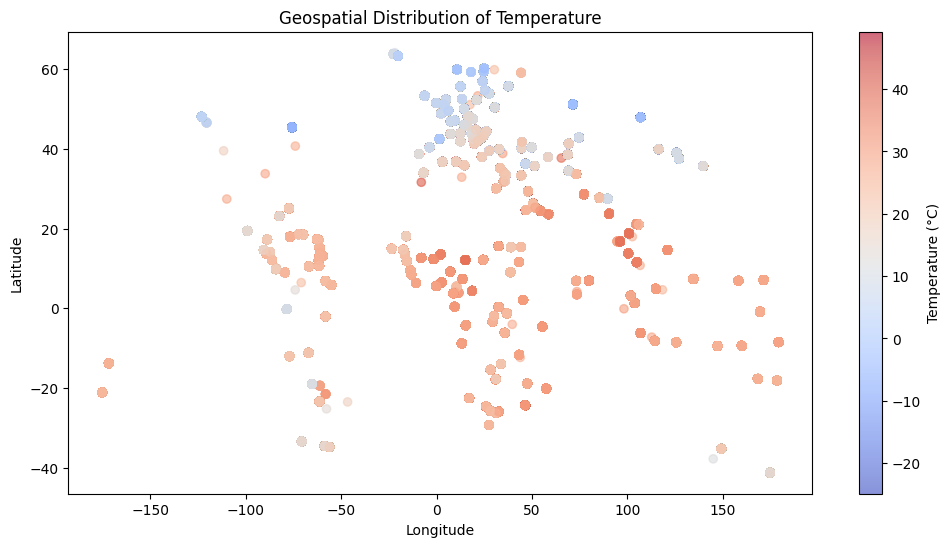

In [18]:
plt.figure(figsize=(12, 6))
scatter = plt.scatter(df_filtered['longitude'], df_filtered['latitude'], c=df_filtered['temperature_celsius'], cmap='coolwarm', alpha=0.6)
plt.colorbar(scatter, label='Temperature (°C)')
plt.title("Geospatial Distribution of Temperature")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

In [19]:
#Air Pollution Heatmap (PM2.5)
map_pm25 = folium.Map(location=[df_filtered['latitude'].median(), df_filtered['longitude'].median()], zoom_start=2)
heat_data = df_filtered[['latitude', 'longitude', 'air_quality_PM2.5']].values.tolist()
HeatMap(heat_data, radius=10).add_to(map_pm25)
map_pm25.save("air_quality_heatmap.html")


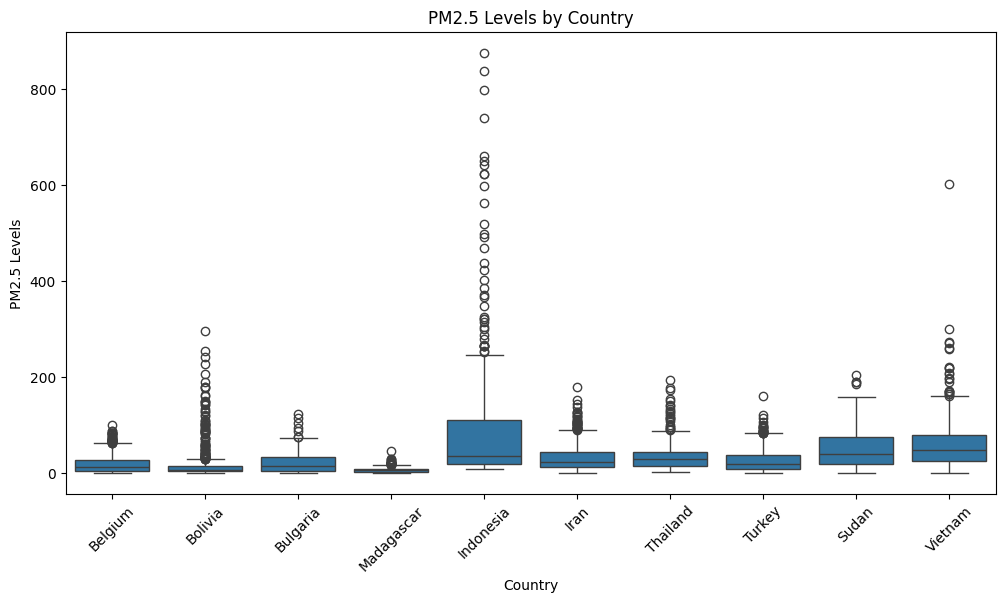

In [20]:
# Regional Air Quality Comparison
plt.figure(figsize=(12, 6))
top_countries = df_filtered['country'].value_counts().index[:10]
df_filtered_region = df_filtered[df_filtered['country'].isin(top_countries)]
sns.boxplot(x='country', y='air_quality_PM2.5', data=df_filtered_region)
plt.xticks(rotation=45)
plt.title("PM2.5 Levels by Country")
plt.xlabel("Country")
plt.ylabel("PM2.5 Levels")
plt.show()

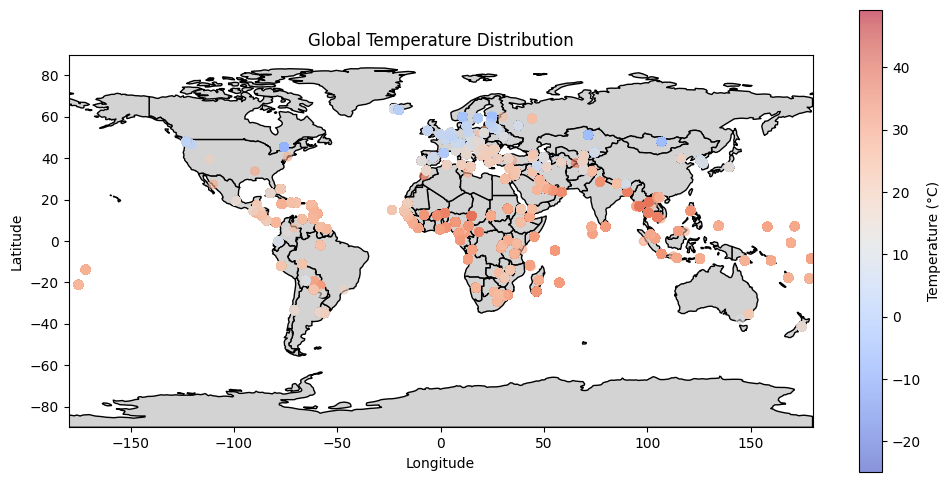

In [21]:
# Load world map from Natural Earth dataset
world = gpd.read_file("https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip")

# Geospatial Scatter Plot on World Map (Temperature)
fig, ax = plt.subplots(figsize=(12, 6))
world.plot(ax=ax, color='lightgrey', edgecolor='black')
sc = ax.scatter(df_filtered['longitude'], df_filtered['latitude'], c=df_filtered['temperature_celsius'], cmap='coolwarm', alpha=0.6)
cbar = plt.colorbar(sc, ax=ax, label='Temperature (°C)')
ax.set_xlim([-180, 180])  # Ensure longitude is correctly mapped
ax.set_ylim([-90, 90])  # Ensure latitude is correctly mapped
plt.title("Global Temperature Distribution")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()